# Regression

# Boston Housing Price Prediction 


Como primer paso cargamos las librerías que se estarán utilizando. En este caso Numpy, Pandas y Sklearn. 

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

2.2.2
2.2.3
3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
1.6.1


Se carga el dataset

In [3]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)

C:\Users\pepez\AppData\Local\Temp\ipykernel_24120\521588708.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)


Confirmamos que el dataset se haya cargado correctamente mostrando las primeras 5 lineas del conjunto de datos

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

Se renommbran las columnas conforme a la desripción puesta arriba. 

In [5]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
df.columns = col_name

Se comprueba que el cambio se haya realizado correctamente. 

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


alternatively, one can load the data from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) itself

Otra opción es cargar el conjunto de datos directo de la base de datos de la librería de SciKit-Learn. Sin embargo, este conjunto de datos ya no está disponible en la librería desde su versión 1.2. De ahí que nos arroja un error en las líneas siguientes. 

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [12]:
boston.keys()

NameError: name 'boston' is not defined

In [13]:
print(boston.DESCR)

NameError: name 'boston' is not defined

In [11]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target

In [12]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Anaysis (EDA)

Generamos algunas medidas estadísticas para cada columna mediante la función Describe()

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Importamos la librería de matplotlib para graficar.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.13.2


Graficamos las variables de manera cruzadas. 

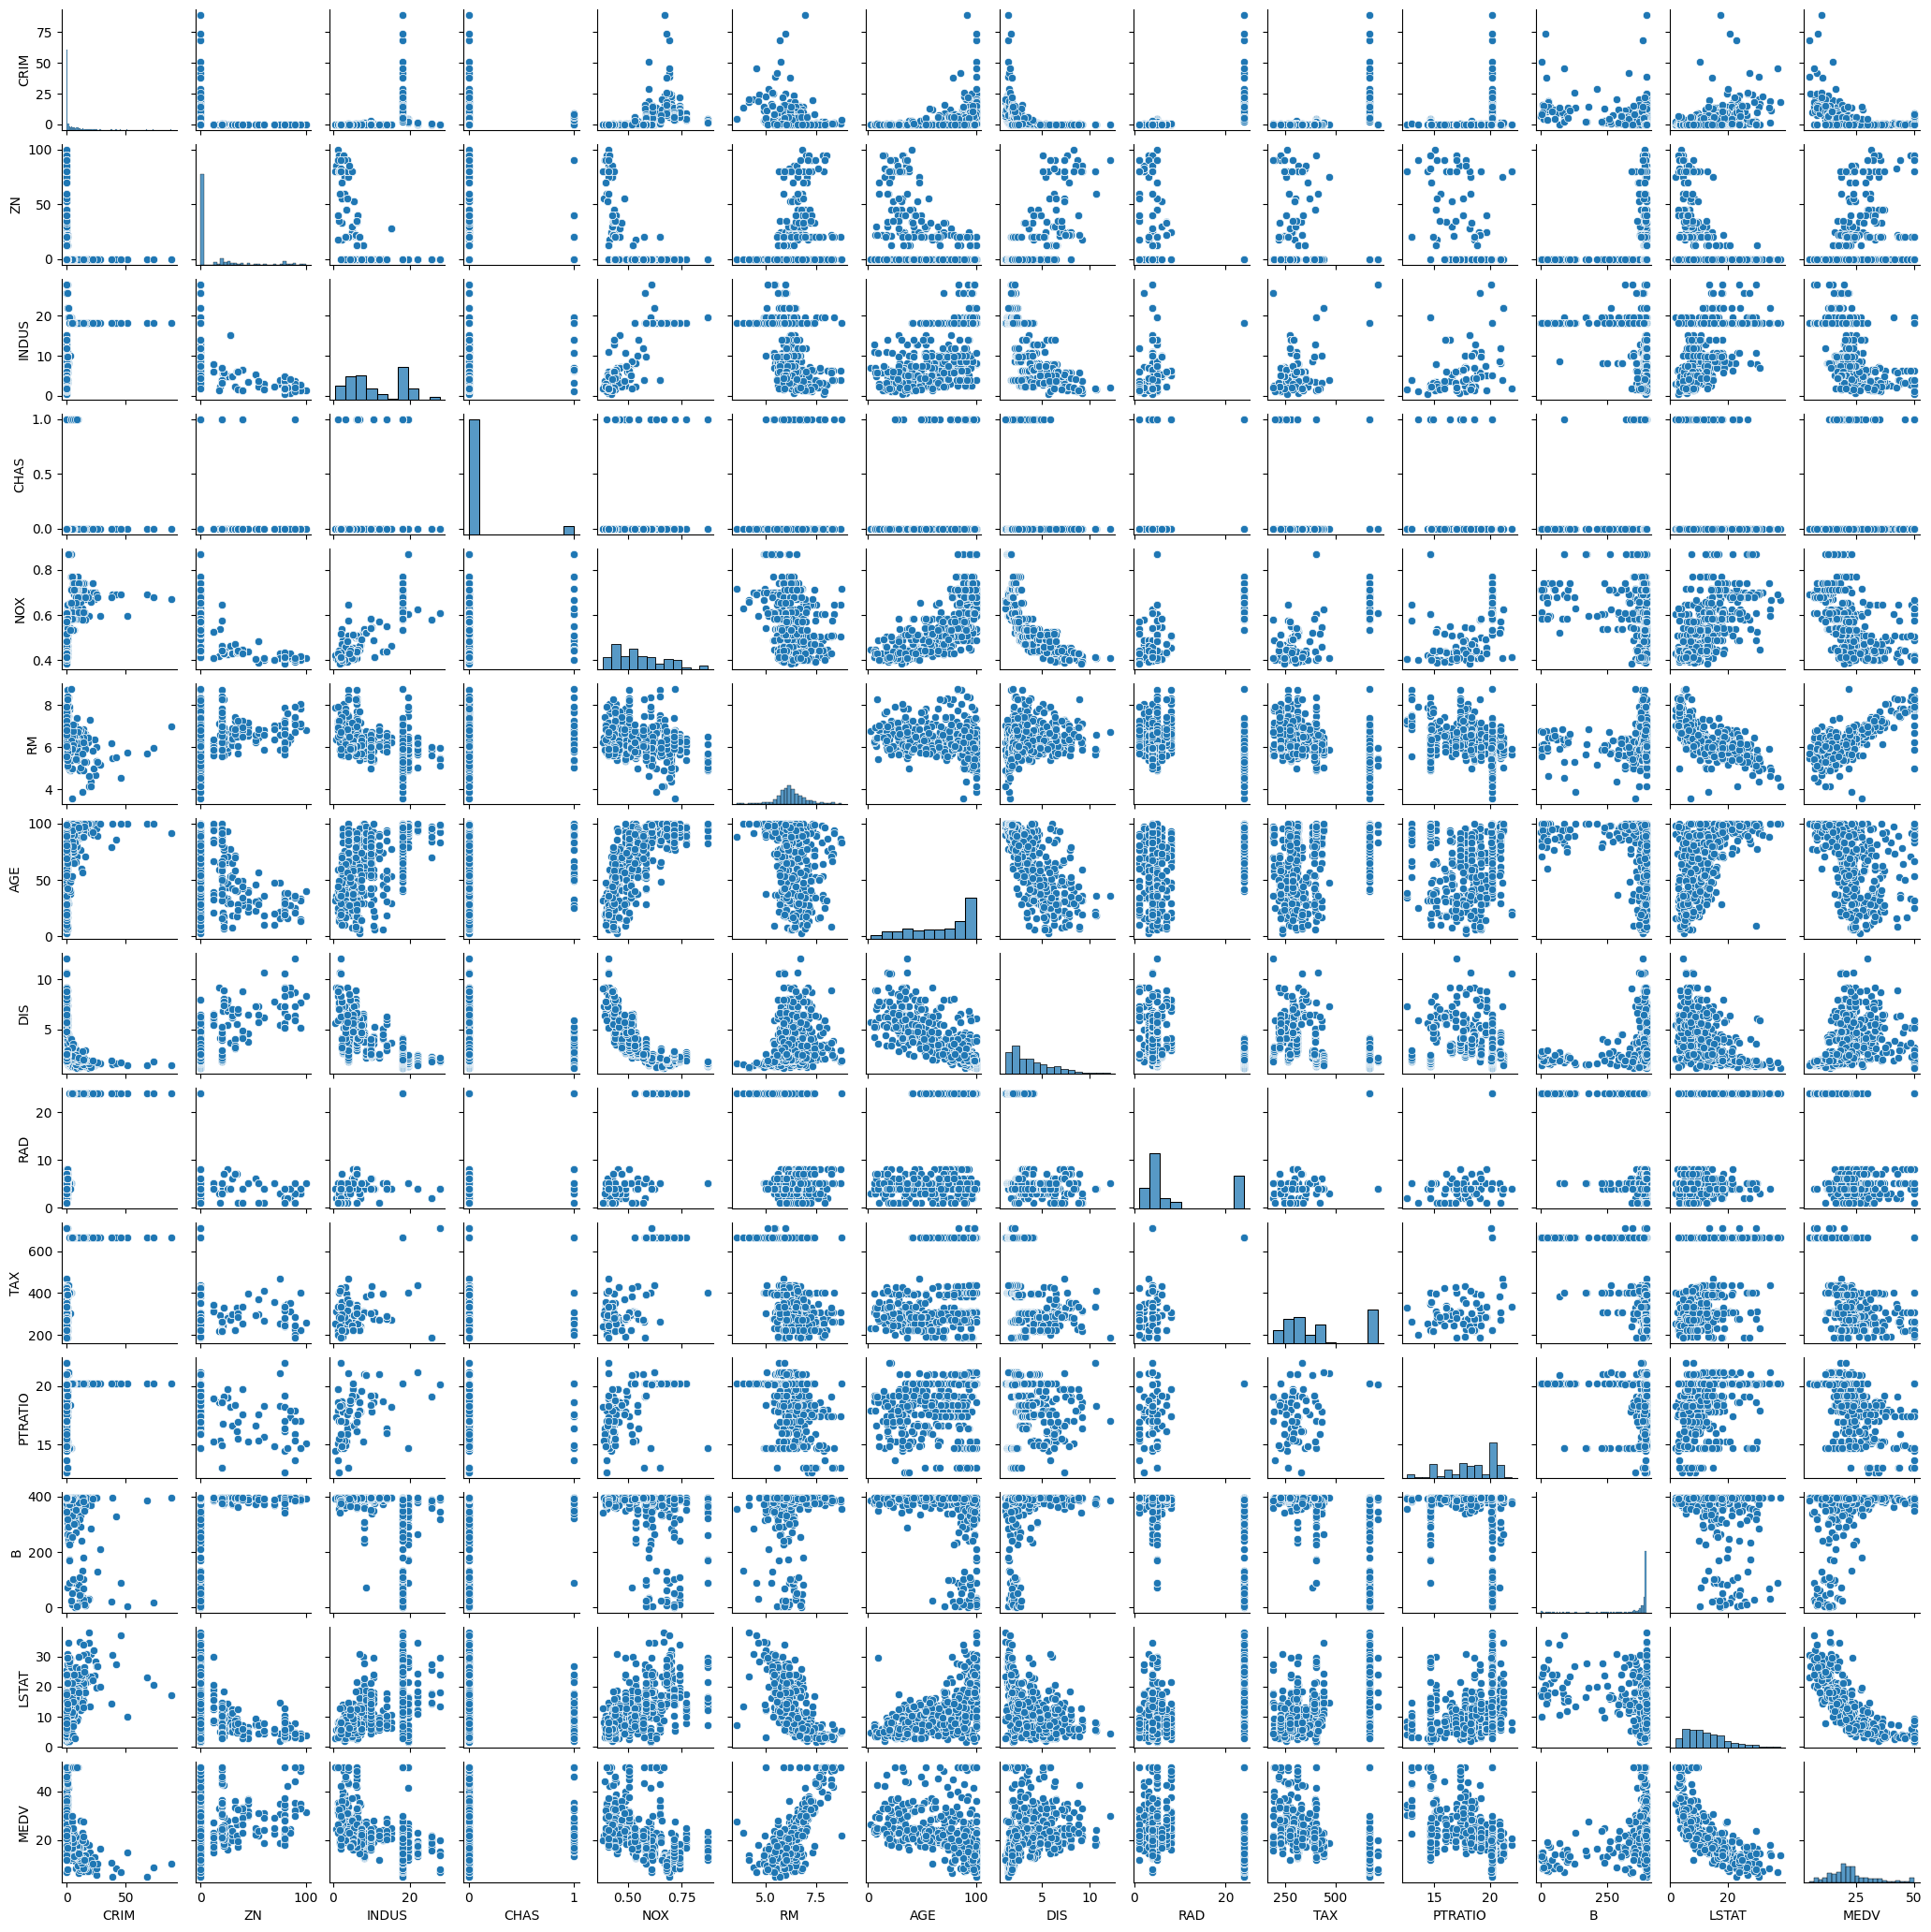

In [17]:
sns.pairplot(df, height=1.5);
plt.show()

Tomamos la muestra

In [18]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

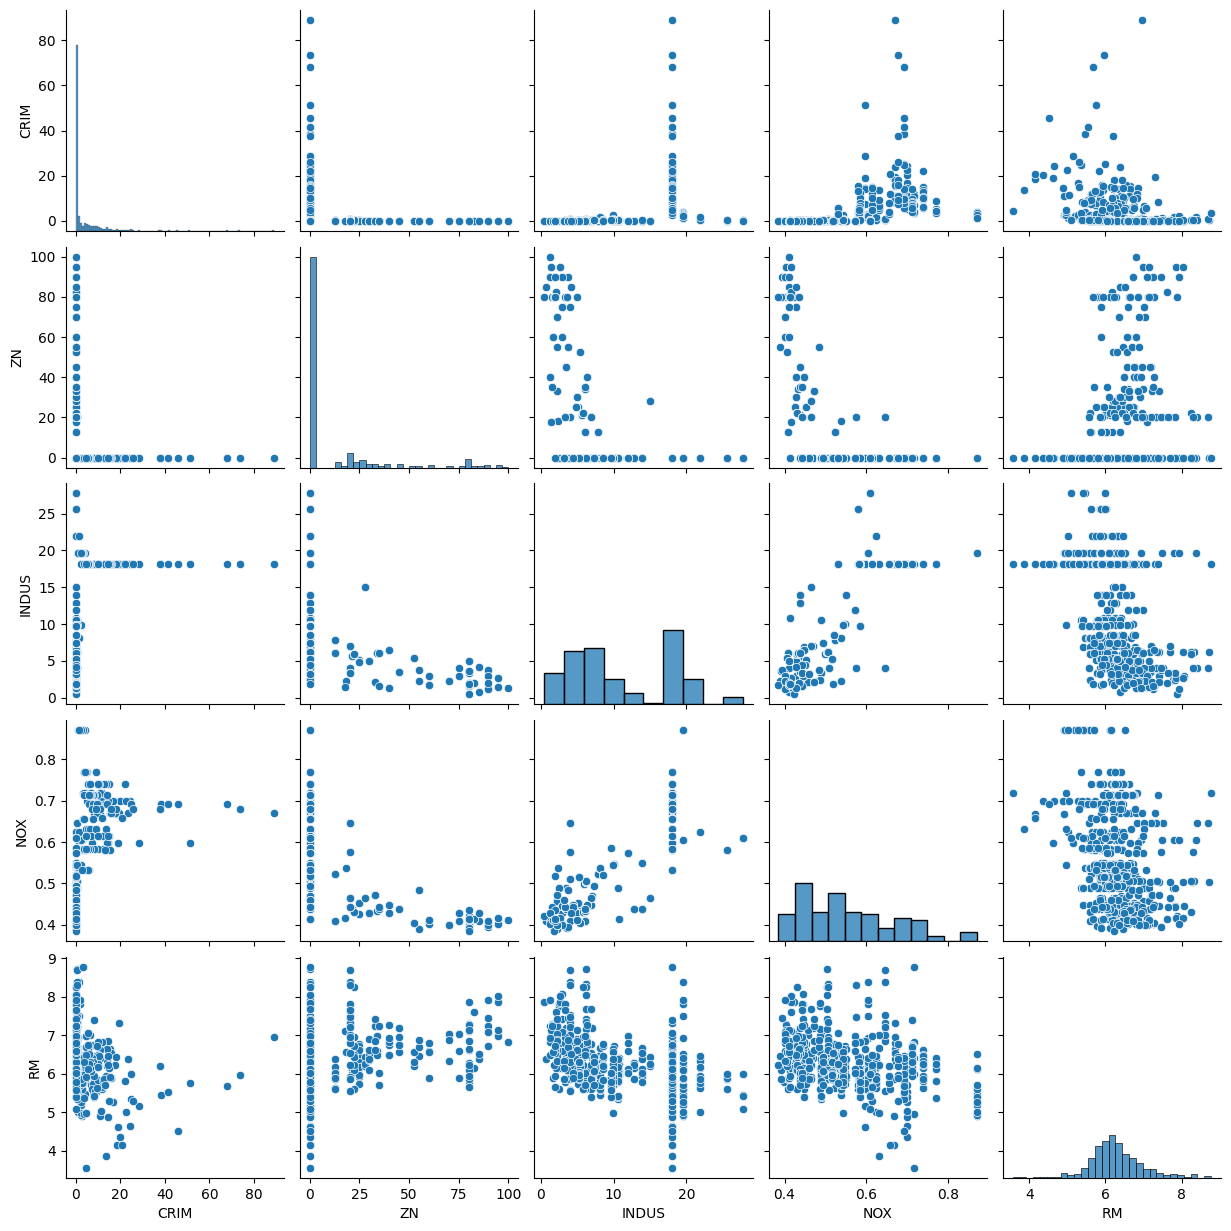

In [19]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [21]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

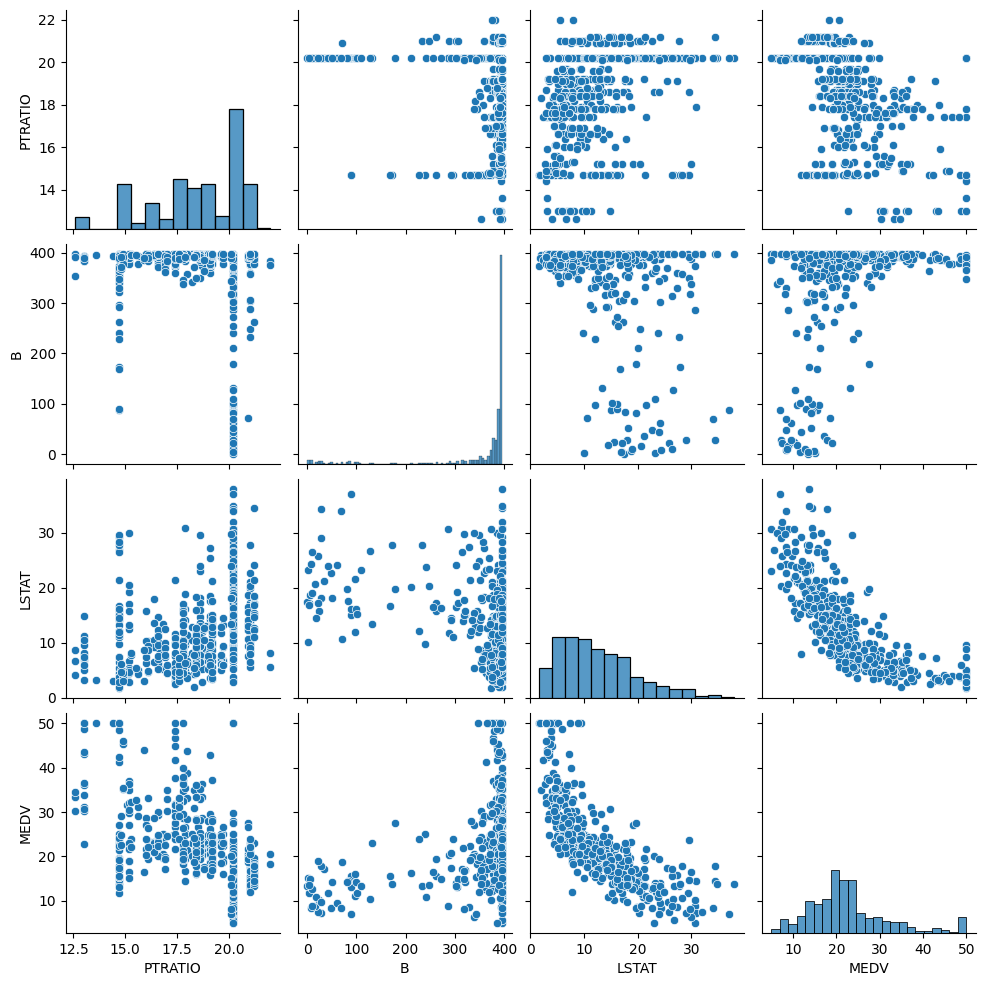

In [22]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

***

# Correlation Analysis and Feature Selection

Revisamos que tanto están relacionados las variables entre ellas. 

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Mediante un mapa de calor, podemos revisar esta correlación de variables ya sea positiva o negativamente. 

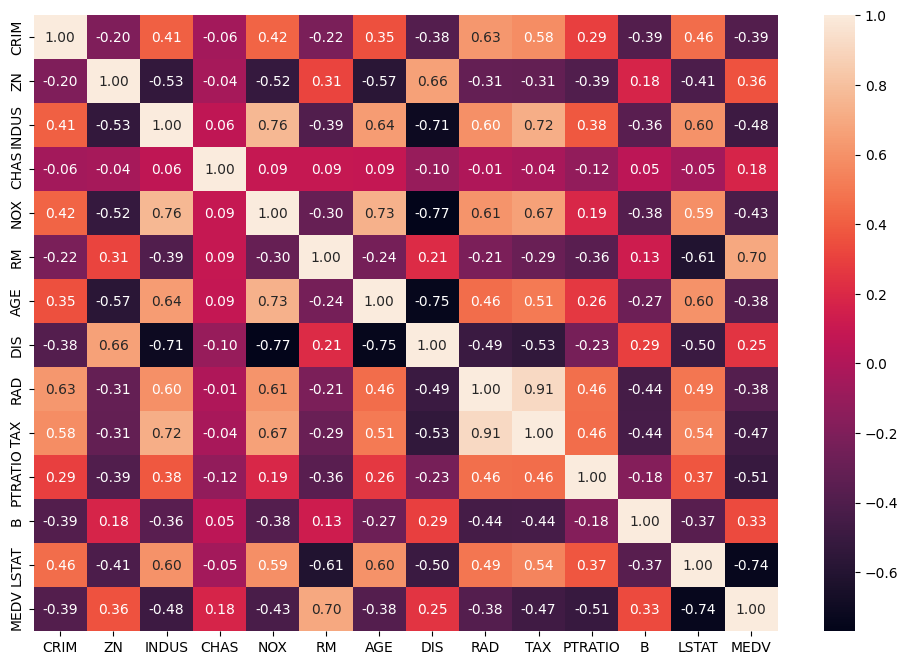

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

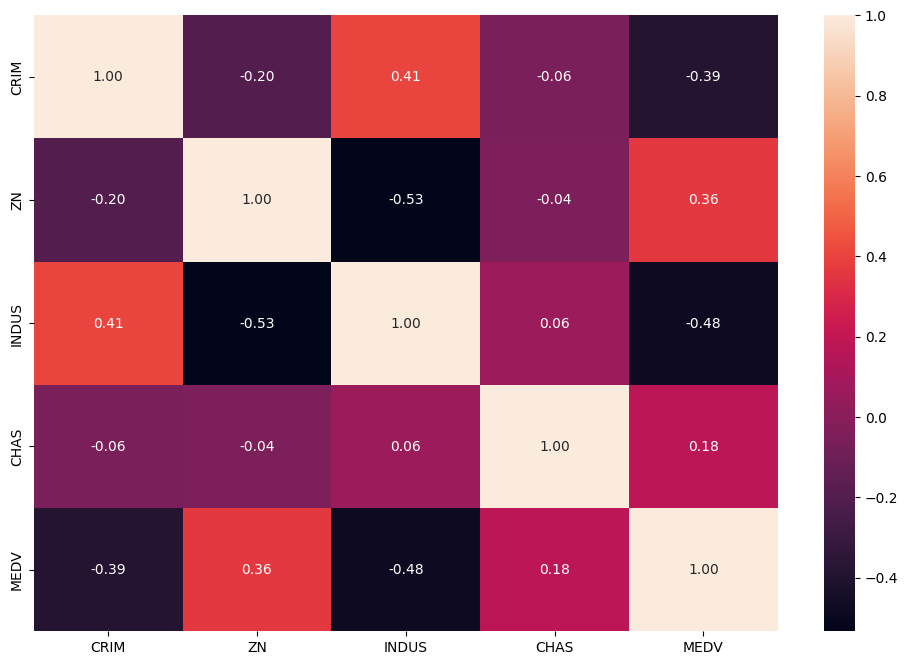

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()

In [26]:
import matplotlib as mpl
print(mpl.__version__)

3.10.0


***

# Linear Regression with Scikit-Learn

Para generar un modelo de regresión lineal.

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


Definimos quienes serán nuestras variables dependiente e indepente. En este caso, estamos utilizando la variable de número de cuartos la cual demostró un alto ínidice de correlación (0.70) con el valor de la propiedad. 

In [28]:
X = df['RM'].values.reshape(-1,1)

In [29]:
y = df['MEDV'].values

Importamos la libería de regresión lineal

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

Ajustamos los valores con los datos que tenemos. 

In [32]:
model.fit(X, y)

LinearRegression()

De aquí podemos ver el valor del coeficiente. Como sólo introdujimos una variable independiente al modelo solo se obtiene un coefienciente. En este caso b1

In [33]:
model.coef_

array([9.10210898])

para el coeficiente de b0, que es donde se intercepta tenemos que su valor es de -34.67

In [33]:
model.intercept_

-34.67062077643857

Graficamos la recta generada por el modelo

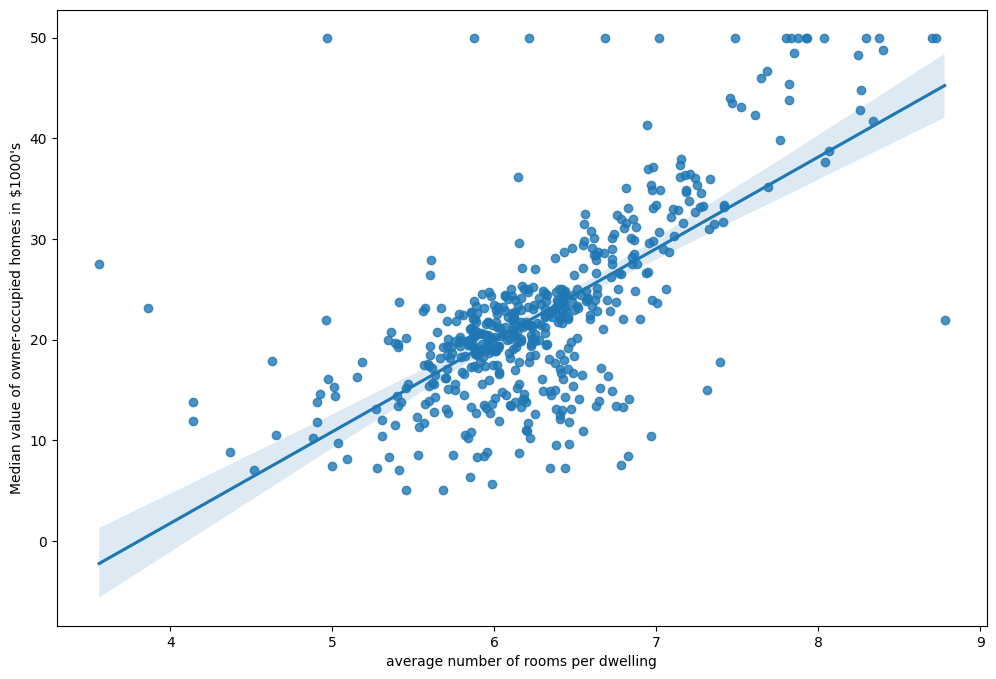

In [39]:
plt.figure(figsize=(12,8));
sns.regplot(x=X, y=y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

En esta otra gráfica podemos mer cómo estan distribuidos los valores de cada una de las variables y qué tanto se aproximan a una distribución normal.

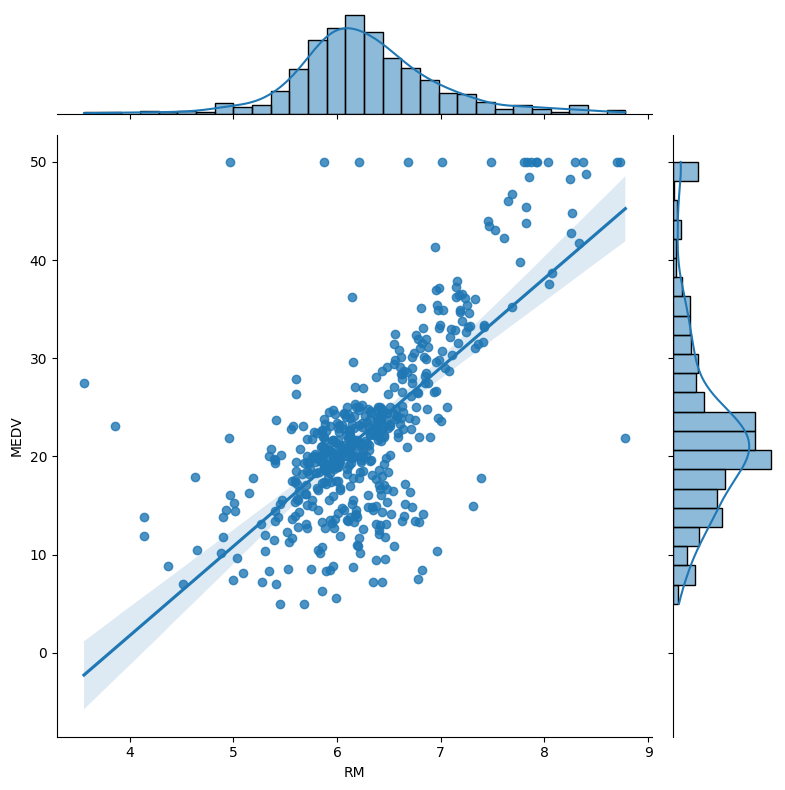

In [40]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

Probamos el modelo con el valor 7

In [41]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

***

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

***

Generamos un segundo modelo de regresión lineal como se hizo en los pasos anteriores, pero ahora considerando % de la población de bajo nivel vs. el costo promedio

In [44]:
# Step 1: Selecting a model

# Step 2: Instantiation
ml_2 = LinearRegression()

# Step 3: Arrange data
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

# Step 4: Model fitting
ml_2.fit(X, y)

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

Graficamos la recta generada de esa relación. Como se ve, estas tienen una relación negativa por lo que a mayor porcentaje de población de bajo nivel el valor promedio disminuye.

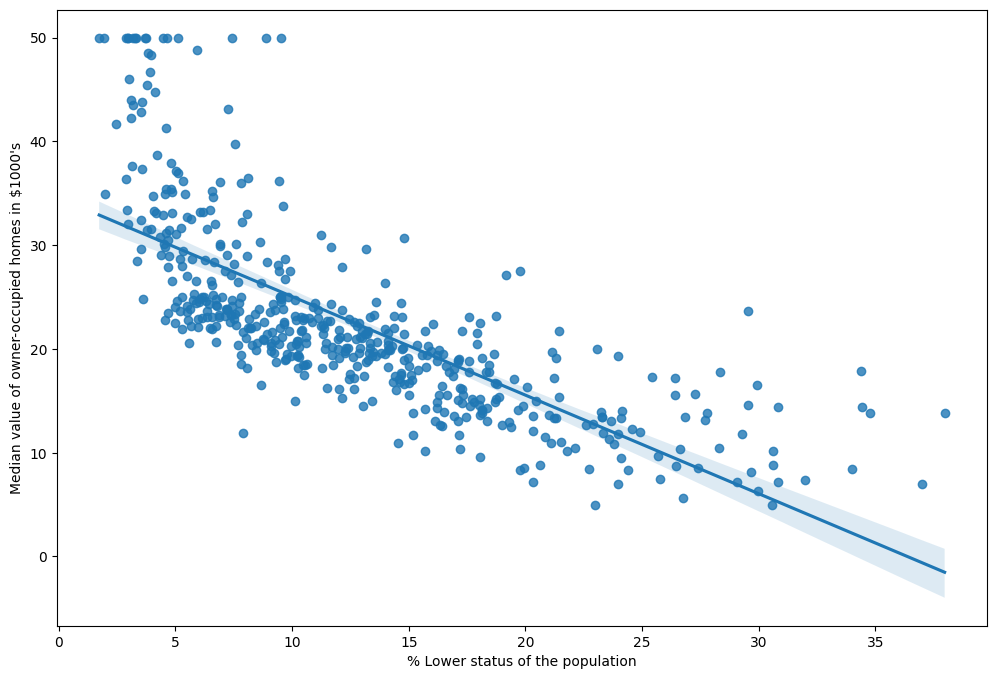

In [47]:
plt.figure(figsize=(12,8));
sns.regplot(x=X, y=y);
plt.xlabel("% Lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

En este caso, al graficar la distribución de las variables podemos ver que el valor está sesgado a la derecha 

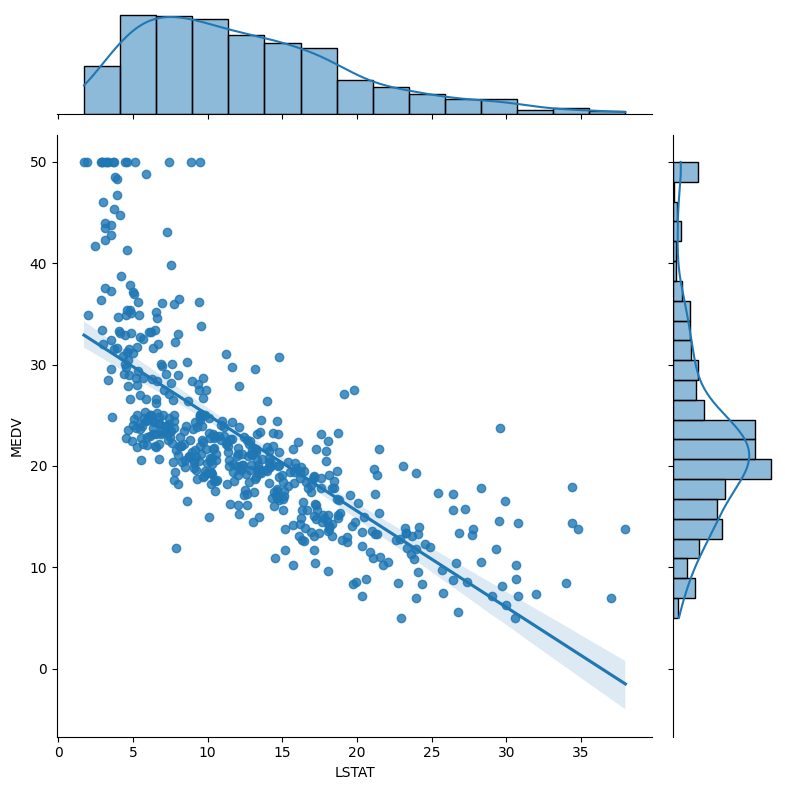

In [49]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();

***

# Robust Regression

Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


## RANdom SAmple Consensus (RANSAC) Algorithm

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

Ahora tomamos un enfoque un poco distinto. Se utilizará el algoritmo RANSAC es cual es un modelo iterativo que se que busca definir los coeficientes del modelo calificándolo por el número de valores no atípicos (inliers). Este funciona seleccionando dos puntos de manera aleatoria genera una gráfica y ve cuántos valores inliers quedan bien ajustados. 

In [51]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

Importamos la librería para este método

In [52]:
from sklearn.linear_model import RANSACRegressor

Generamos el modelo

In [53]:
ransac = RANSACRegressor()

Ajustamos el modelo

In [54]:
ransac.fit(X, y)

RANSACRegressor()

Guardamos en una variable los valores que se catalogaron como inliers y como outliers.

In [55]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

Probamos el modelo, para ello generamos un arreglo de 7 valores que van del 3 al 9 con un paso de 1

In [56]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [61]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

Graficamos el modelo generado. Los valores en azúl son todos aquellos que entran en el rango de inliers, mientras que los rojos son los que quedaron fuera de este rango. 

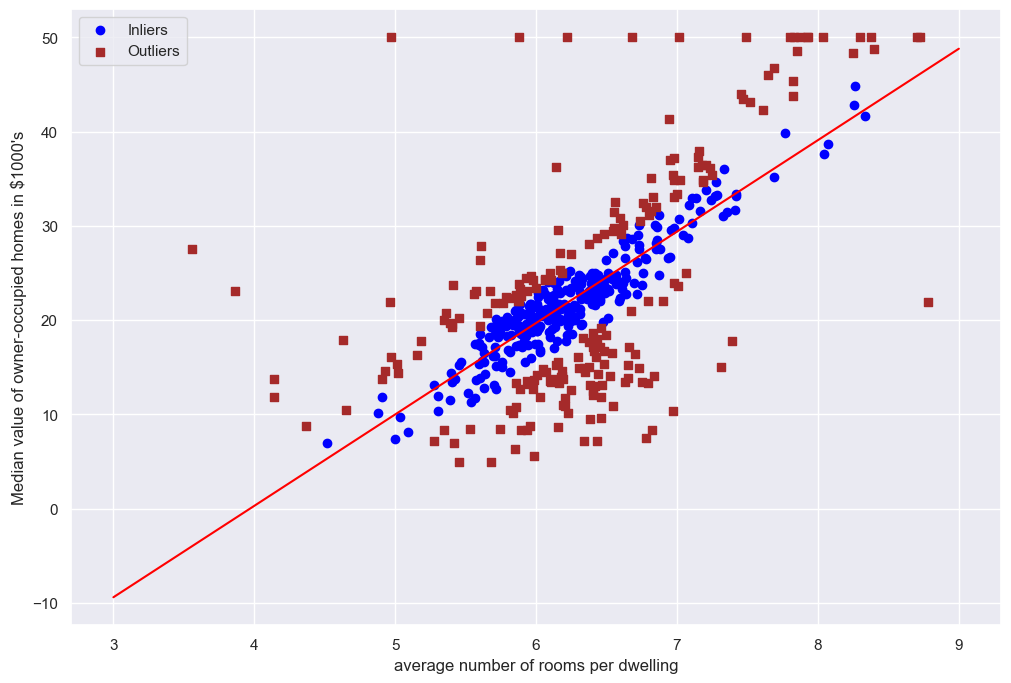

In [62]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

Revisamos los coeficientes b1 y b0 obtenidos mediante el RANSAC.

In [59]:
ransac.estimator_.coef_

array([9.69545799])

In [60]:
ransac.estimator_.intercept_

np.float64(-38.47433120526888)

Si los comparamos con el modelo que habíamos hecho utilizando la libería de regresión lineal, teníamos que b1=9.10210898 en regresión lineal vs. b1(RANSAC)=9.69545799 y b0(Regresion)=-34.6706207764 vs b0(RANSAC)=-38.47433. Son valores similares, pero no idénticos. Recordemos que esto se debe a que el segundo es un método aleatorio. 

***

Hacemos el mismo método (RANSAC) para comparar el segundo modelo que consideraba el % de la población baja.

In [63]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

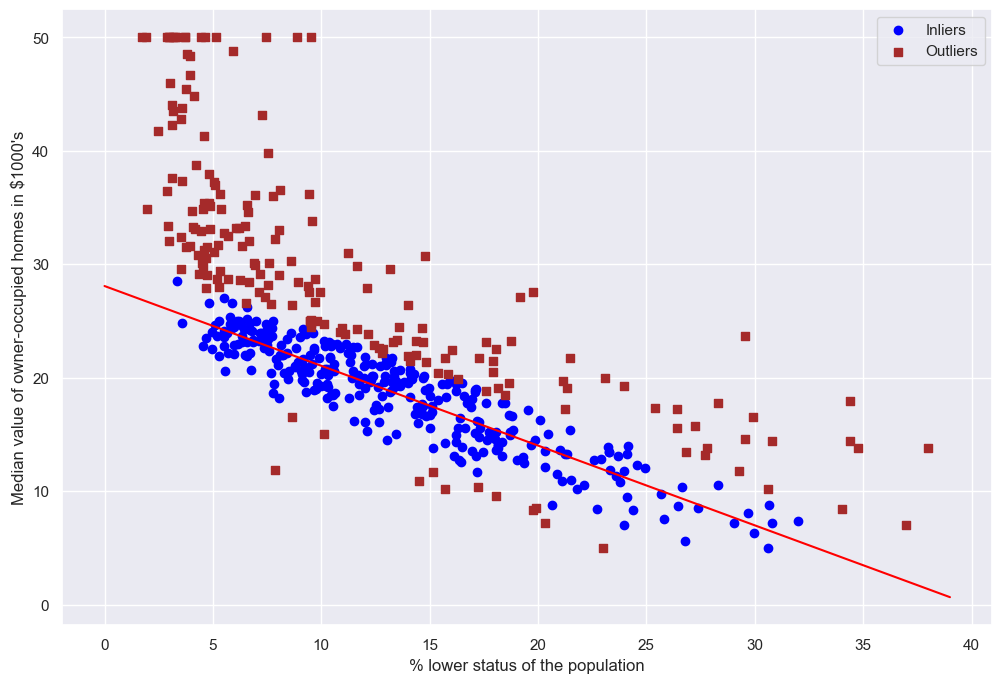

In [64]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

# Performance Evaluation of Regression Model

Para saber qué tan bien se está ajustando nuestro modelo, echamos mano de índices de desempeño. Para ello vamos a dividir nuestro conjunto de datos en dos subconjuntos el de entrenamiento y el de prueba. A partir de ahí es que calcularemos los índices. 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


Identificamos las vartiables dependientes e independientes. 

In [67]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [68]:
y = df['MEDV'].values

Dividimos en los subconjuntos. 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Creamos el modelo de regresión lineal

In [70]:
lr = LinearRegression()

Lo entrenamos con los valores de entrenamiento

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

Predecimos los valores con base en el modelo creado tanto para las X de entrenamiento como las de prueba

In [72]:
y_train_pred = lr.predict(X_train)

In [73]:
y_test_pred = lr.predict(X_test)

***

# Method 1: Residual Analysis

El método de los residuales se basa en la diferencia entre el valor observado y el valor predicho. 

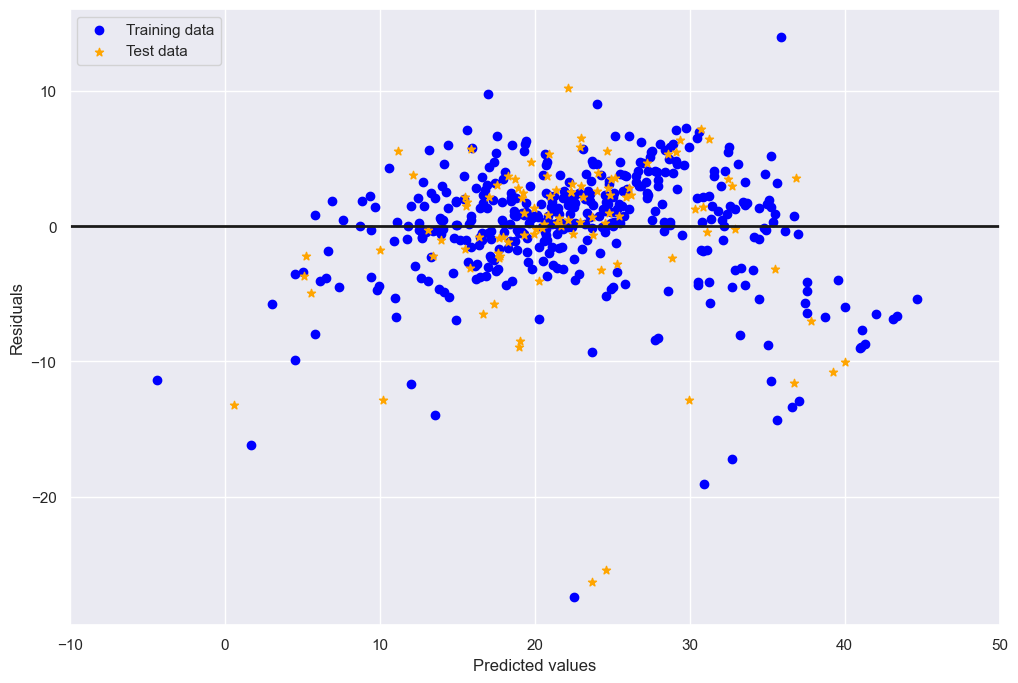

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

En la gráfica podemos ver un rango signficativo en los residuales. 

***

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

Este segundo método utiliza la media de mínimos cuadrados. Este es uno de los métodos más comunes. 

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mean_squared_error(y_train, y_train_pred)

19.32647020358573

In [77]:
mean_squared_error(y_test, y_test_pred)

33.44897999767645

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

El coeficiente de determinación. Esta métrica nos dice que tan bien se ajusta el modelo a los datos. Este coeficiente sólo aplica para modelos lineales. 

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_train, y_train_pred)

0.7730135569264233

In [80]:
r2_score(y_test, y_test_pred)

0.5892223849182516

***

# What does a Near Perfect Model Looks like?

En un modelo ficticio donde los datos se comportan exageradamente lineales. Tenemos una gráfica como la que se muestra. 

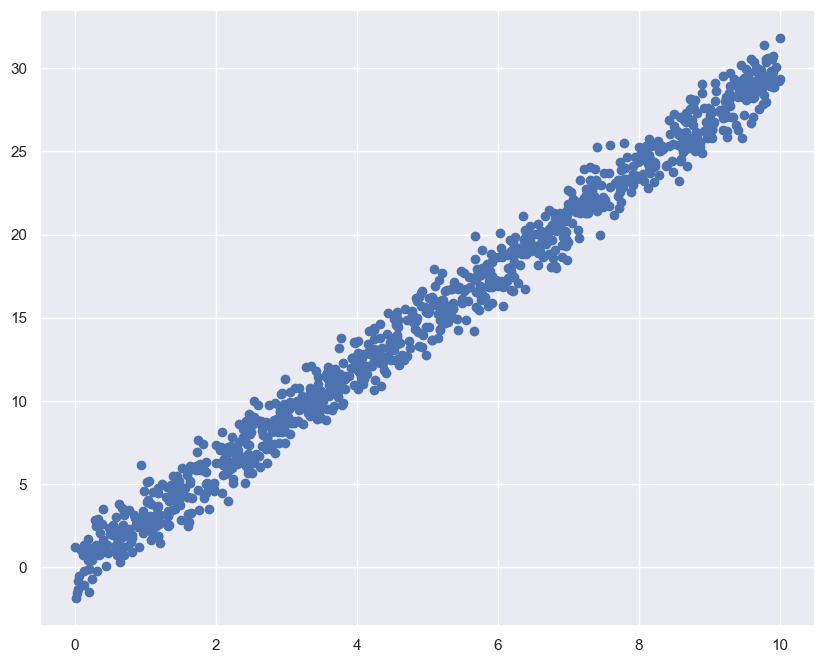

In [81]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

Utilizando los métodos de evaluación del modelo tenemos:

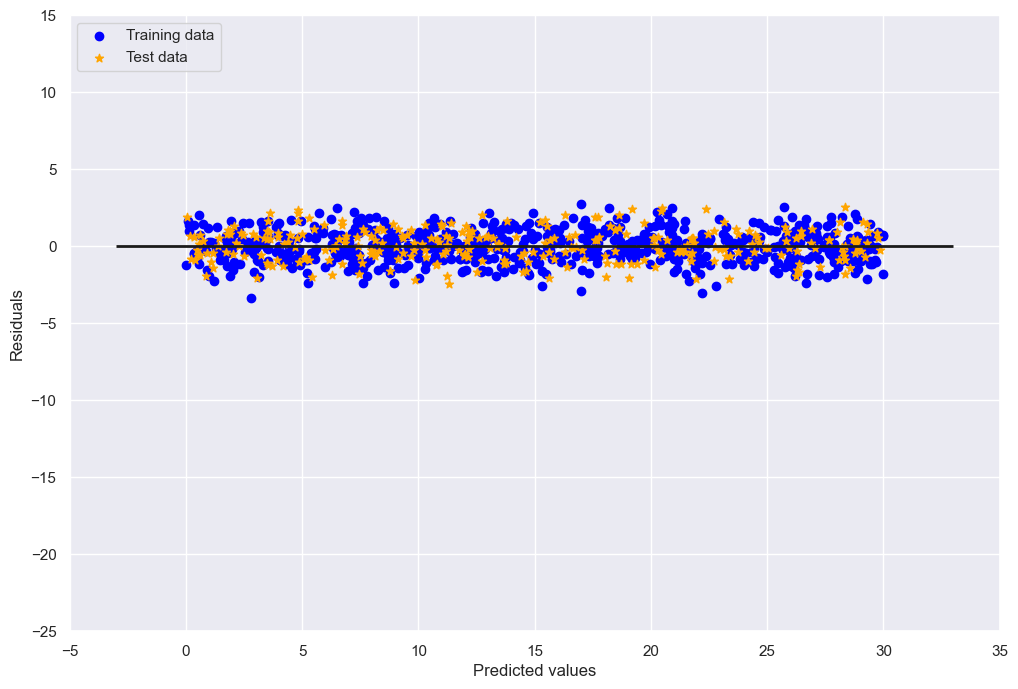

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

La dispersión de la diferencia es muy pequeña

# Method 2: Mean Squared Error (MSE)

In [86]:
mean_squared_error(y_train, y_train_pred)

1.0074003296530236

In [87]:
mean_squared_error(y_test, y_test_pred)

1.0423317214638994

La media del error cuadrado es muy pequeña, lo que nos dice que el modelo se ajusta muy bien. 

# Method 3: Coefficient of Determination, $R^2$

In [88]:
r2_score(y_train, y_train_pred)

0.9868372462921201

In [89]:
r2_score(y_test, y_test_pred)

0.9866248818452706

este valor está muy cercano a 1 lo que dice que el modelo es extremadamente bueno.

***

# Yet to be covered

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering. E.g., Combining Features, Designing derivative features
* Data preparation. E.g., missing values etc.
* Categorical features
* Transform data / feature scaling. Scikit-learn Pipeline
* Fine Tuning. E.g., Grid Search, Randomized Search
* Ensemble Methods


***